# 02 - Frequentist Logistic Regression (Baseline)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
# Load processed data
df = pd.read_csv("../data/processed_fraud.csv")
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [3]:
# Define features and label
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [4]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (5090096, 11)
Test set shape: (1272524, 11)


In [5]:

clf = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs', class_weight='balanced', random_state=42)

In [6]:
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.92      0.06      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.94      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

Confusion Matrix:
 [[1221707   49174]
 [    128    1515]]
ROC AUC: 0.9873750374620314


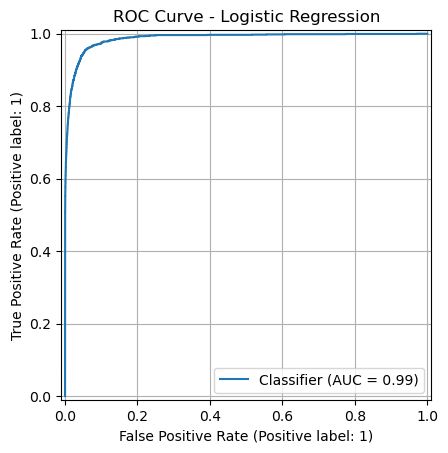

In [9]:
# ROC and PR curves
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Logistic Regression")
plt.grid()
plt.show()


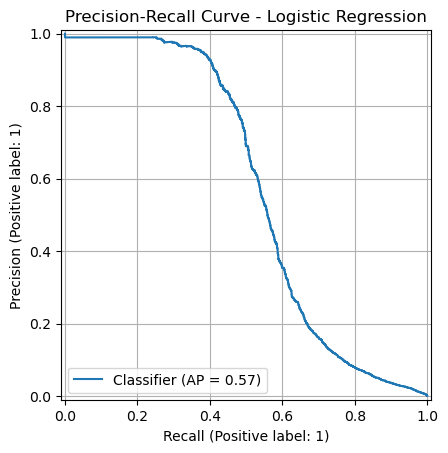

In [10]:
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve - Logistic Regression")
plt.grid()
plt.show()